<a href="https://colab.research.google.com/github/danless-data/titanic_survived_regresion_logistica/blob/main/Titanic_Survived_Regresion_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [150]:
data = pd.read_csv('titanic.csv')

In [151]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='Survived', ylabel='count'>

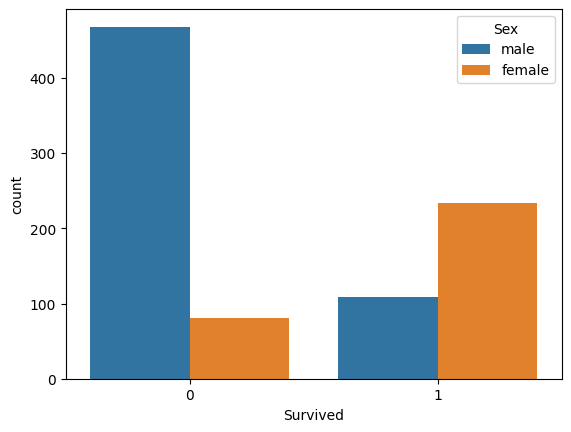

In [153]:
sns.countplot(x='Survived', data=data, hue='Sex')

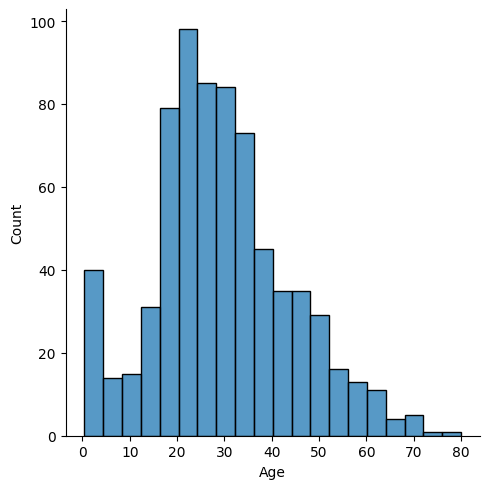

In [154]:
sns.displot(x='Age', data=data)

In [155]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

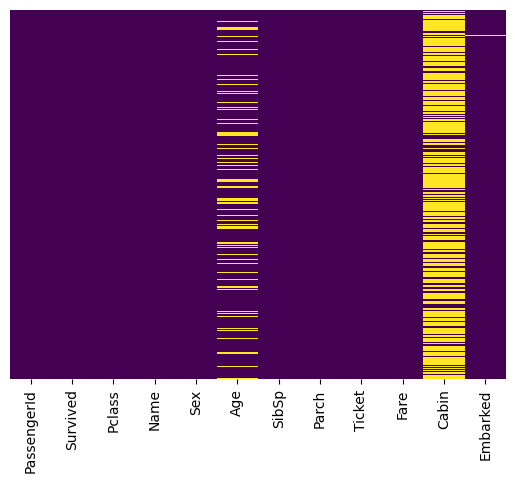

In [156]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Evaluamos cuanto es el porcentaje de valores nulos por columna.

In [157]:
null_data = (data.isnull().sum() / data.shape[0]) * 100
null_data.apply(lambda x: f"{x:.1f}%")

PassengerId     0.0%
Survived        0.0%
Pclass          0.0%
Name            0.0%
Sex             0.0%
Age            19.9%
SibSp           0.0%
Parch           0.0%
Ticket          0.0%
Fare            0.0%
Cabin          77.1%
Embarked        0.2%
dtype: object

**Age:** La edad que es tipo de dato continuo, se puede imputar los valores nulos usando la media.


---


**Cabin:** El numero de cabinas parece ser irrelevante para el analisis pero se puede imputar con el valor mas frecuente.


---

**Embarked:** es un dato categorico que le podemos imputar los datos nulos removiendo las filas faltantes ya que solo representan un **0.2%** de los datos y su impacto en el analisis es muy insignificante.



In [158]:
import numpy as np
from sklearn.impute import SimpleImputer


#Usamos la media para imputar valores nulos

imputer_age = SimpleImputer(missing_values=np.nan, strategy='mean')

data['Age'] = imputer_age.fit_transform(data['Age'].values.reshape(-1, 1))

#Usamos el tipo de dato mas frecuente (Moda)

imputer_cabin = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

data['Cabin'] = imputer_cabin.fit_transform(data['Cabin'].values.reshape(-1, 1))

# Eliminando filas con valores nulos en Embarked

data = data.dropna(subset=['Embarked'])

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [160]:
#Transformamos la columna Pclass a dummies.

pclass_dummies = pd.get_dummies(data['Pclass'], drop_first=True)

# Transformamos la columna Sex a dummies.

sex_male = pd.get_dummies(data['Sex'], drop_first=True)

# Hacemos lo mismo con la columna Embarked

Embarked_dummies = pd.get_dummies(data['Embarked'], drop_first=True)

In [161]:
data = data.join(pd.concat([pclass_dummies, sex_male, Embarked_dummies], axis=1))

In [162]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,2,3,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,0,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,0,1,1,0,1


In [163]:
# Procedemos a eliminar colunmas innecesarias.

data = data.drop(['Embarked', 'Cabin', 'Ticket', 'Sex', 'Name', 'PassengerId', 'Pclass'], axis=1)

# Renombramos las columnas numericas.

data.rename(columns={2: 'class_two', 3: 'class_three'}, inplace=True)

In [164]:
data.head()

,Survived,Age,SibSp,Parch,Fare,class_two,class_three,male,Q,S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


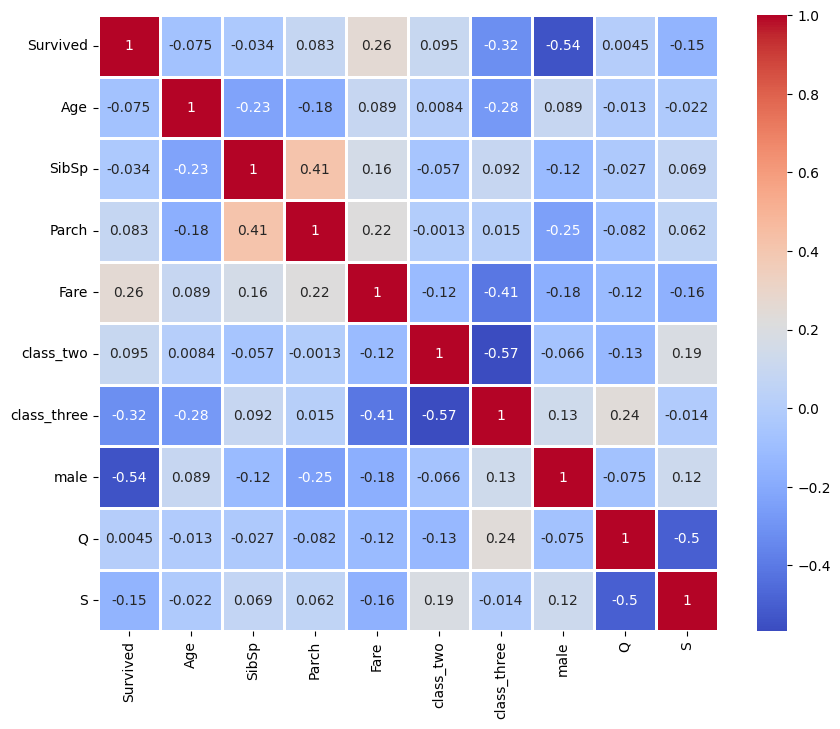

In [165]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

sns.heatmap(data.corr(), annot=True,  cmap='coolwarm', linewidths=1)

plt.show()

In [166]:
data.corr().sort_values(by='Survived', ascending=False)

,Survived,Age,SibSp,Parch,Fare,class_two,class_three,male,Q,S
Survived,1.000000,-0.074673,-0.034040,0.083151,0.255290,0.095002,-0.320171,-0.541585,0.004536,-0.151777
Fare,0.255290,0.088604,0.160887,0.217532,1.000000,-0.117609,-0.411932,-0.179958,-0.116684,-0.163758
class_two,0.095002,0.008416,-0.056507,-0.001278,-0.117609,1.000000,-0.567432,-0.066459,-0.127705,0.190824
Parch,0.083151,-0.178232,0.414542,1.000000,0.217532,-0.001278,0.014634,-0.247508,-0.081585,0.061512
Q,0.004536,-0.012823,-0.026692,-0.081585,-0.116684,-0.127705,0.237035,-0.075217,1.000000,-0.499261
SibSp,-0.034040,-0.231875,1.000000,0.414542,0.160887,-0.056507,0.091515,-0.116348,-0.026692,0.069438
Age,-0.074673,1.000000,-0.231875,-0.178232,0.088604,0.008416,-0.278527,0.089434,-0.012823,-0.021589
S,-0.151777,-0.021589,0.069438,0.061512,-0.163758,0.190824,-0.013594,0.121405,-0.499261,1.000000
class_three,-0.320171,-0.278527,0.091515,0.014634,-0.411932,-0.567432,1.000000,0.134227,0.237035,-0.013594
male,-0.541585,0.089434,-0.116348,-0.247508,-0.179958,-0.066459,0.134227,1.000000,-0.075217,0.121405


In [167]:
data.describe()

,Survived,Age,SibSp,Parch,Fare,class_two,class_three,male,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,29.653446,0.524184,0.382452,32.096681,0.206974,0.552306,0.649044,0.086614,0.724409
std,0.486260,12.968366,1.103705,0.806761,49.697504,0.405365,0.497536,0.477538,0.281427,0.447063
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


Hasta este punto vamos a probar distintos enfoques en varios modelos de entrenamiento para ver como se comporta cada uno de ellos.

Primera Prueba: Regresion Logistica con 4 tipos de soluciones: **newton-cg**, **lbfgs**, **liblinear** y **sag**

In [168]:
from sklearn.model_selection import train_test_split

X = data.drop(['Survived'], axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [169]:
X_train

,Age,SibSp,Parch,Fare,class_two,class_three,male,Q,S
486,35.000000,1,0,90.0000,0,0,0,0,1
293,24.000000,0,0,8.8500,0,1,0,0,1
173,21.000000,0,0,7.9250,0,1,1,0,1
450,36.000000,1,2,27.7500,1,0,1,0,1
361,29.000000,1,0,27.7208,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
107,29.699118,0,0,7.7750,0,1,1,0,1
271,25.000000,0,0,0.0000,0,1,1,0,1
862,48.000000,0,0,25.9292,0,0,0,0,1
436,21.000000,2,2,34.3750,0,1,0,0,1


In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag']

cm_list = []

reports_list = []


for solver in solvers:

  model = LogisticRegression(solver=solver, max_iter=1000)

  model.fit(X_train, y_train)

  prediction = model.predict(X_test)

  #Guardando la matrix de confusion de cada uno.

  cm = confusion_matrix(y_test, prediction)

  cm_list.append(cm)

  # Guardando el reporte de cada uno.

  reports_list.append(pd.DataFrame(classification_report(y_test, prediction, output_dict=True)))


classification_report = dict(zip(solvers, reports_list))


In [171]:
def new_pre_model(solver, array):

  if solver in ['newton-cg', 'lbfgs', 'liblinear', 'sag']:

    model = LogisticRegression(solver=solver, max_iter=1000)
    model.fit(X_train, y_train)
    prediction = model.predict([array])

    return prediction
  else:
    return 'Error Solver!'


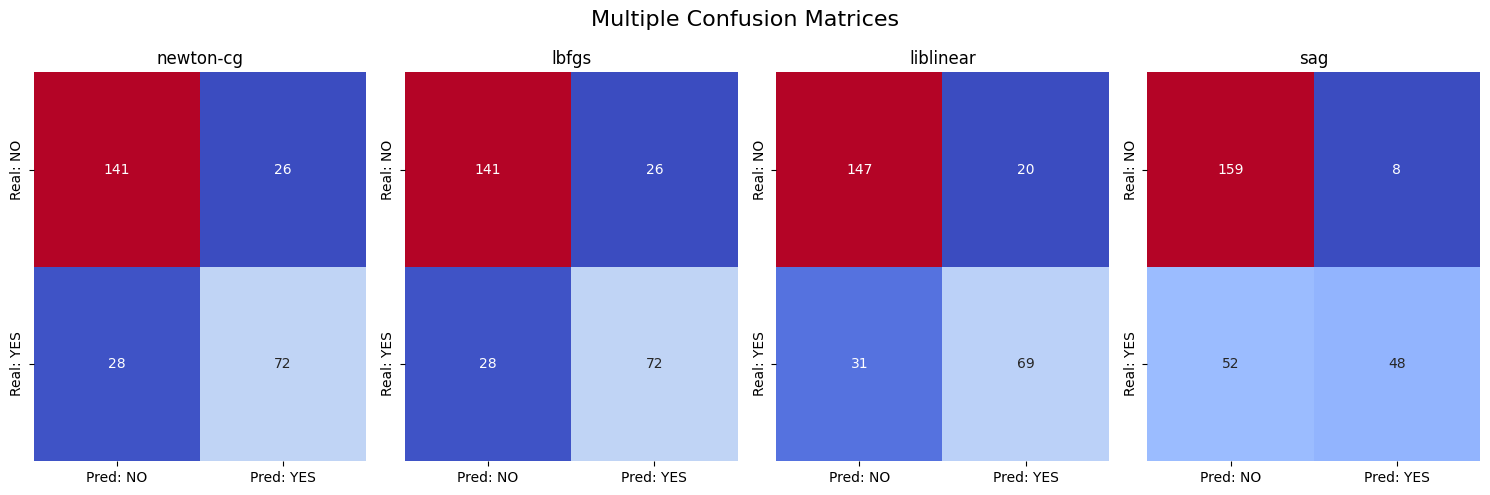

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt


legend_list = solvers
xticklabels=['Pred: NO', 'Pred: YES']
yticklabels=['Real: NO', 'Real: YES']


fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i, (cm, legend_title) in enumerate(zip(cm_list, legend_list)):

    sns.heatmap(cm, annot=True, cbar=False, fmt='g', ax=axes[i],
                xticklabels=xticklabels, yticklabels=yticklabels, cmap='coolwarm')
    axes[i].set_title(legend_title, fontsize=12)


plt.suptitle("Multiple Confusion Matrices", fontsize=16)

plt.tight_layout()
plt.show()


In [173]:
# Imprimimos el reporte de cada una de las metricas de clasificación

for solver in solvers:
  print('\n')
  print(f'Model: {solver}', '\t')
  display(classification_report[solver])




Model: newton-cg 	


,0,1,accuracy,macro avg,weighted avg
precision,0.834320,0.734694,0.797753,0.784507,0.797007
recall,0.844311,0.720000,0.797753,0.782156,0.797753
f1-score,0.839286,0.727273,0.797753,0.783279,0.797333
support,167.000000,100.000000,0.797753,267.000000,267.000000




Model: lbfgs 	


,0,1,accuracy,macro avg,weighted avg
precision,0.834320,0.734694,0.797753,0.784507,0.797007
recall,0.844311,0.720000,0.797753,0.782156,0.797753
f1-score,0.839286,0.727273,0.797753,0.783279,0.797333
support,167.000000,100.000000,0.797753,267.000000,267.000000




Model: liblinear 	


,0,1,accuracy,macro avg,weighted avg
precision,0.825843,0.775281,0.808989,0.800562,0.806906
recall,0.880240,0.690000,0.808989,0.785120,0.808989
f1-score,0.852174,0.730159,0.808989,0.791166,0.806475
support,167.000000,100.000000,0.808989,267.000000,267.000000




Model: sag 	


,0,1,accuracy,macro avg,weighted avg
precision,0.753555,0.857143,0.775281,0.805349,0.792352
recall,0.952096,0.480000,0.775281,0.716048,0.775281
f1-score,0.841270,0.615385,0.775281,0.728327,0.756669
support,167.000000,100.000000,0.775281,267.000000,267.000000


In [174]:
# Creando una persona aletoria.

new_person  = [25, 1, 0, 72, 0, 0, 0, 0, 1]

In [175]:
if new_pre_model(solver='newton-cg', array=new_person)[0] == 1:
  print('Sobrevivio')
else:
  print('No Sobrevivio')

Sobrevivio
